## Getting data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the base directory
base_dir = r'./csv'

# Define the structure and mapping of files to patient IDs
chum_files = {
    r"landmarks\chum\landmark_distances_mm_1.csv": 1,
    r"landmarks\chum\landmark_distances_mm_3.csv": 3,
    r"landmarks\chum\landmark_distances_mm_4.csv": 4,
    r"landmarks\chum\landmark_distances_mm_5.csv": 5,
    r"landmarks\chum\landmark_distances_mm_11.csv": 11,
    r"landmarks\chum\landmark_distances_mm_14.csv": 14
}

hgj_files = {
    r"landmarks\hgj\HN-HGJ-005.csv": 5,
    r"landmarks\hgj\HN-HGJ-006.csv": 6,
    r"landmarks\hgj\HN-HGJ-008.csv": 8,
    r"landmarks\hgj\HN-HGJ-009.csv": 9,
    r"landmarks\hgj\HN-HGJ-012.csv": 12,
}

hmr_files = {
    r"landmarks\hmr\hmr_001_landmark.csv": 1,
    r"landmarks\hmr\hmr_002_landmark.csv": 2,
    r"landmarks\hmr\hmr_003_landmark.csv": 3,
    r"landmarks\hmr\hmr_004_landmark.csv": 4,
    r"landmarks\hmr\hmr_005_landmark.csv": 5,
    r"landmarks\hmr\hmr_006_landmark.csv": 6,
    r"landmarks\hmr\hmr_007_landmark.csv": 7,
    r"landmarks\hmr\hmr_008_landmark.csv": 8,
    r"landmarks\hmr\hmr_019_landmark.csv": 19,
    r"landmarks\hmr\hmr_027_landmark.csv": 27

}

olivetti_files = {
    r"landmarks\olivetti\landmark_distances_mm_1_olivetti.csv": 'S1',
    r"landmarks\olivetti\landmark_distances_mm_2_olivetti.csv": 'S2',
    r"landmarks\olivetti\landmark_distances_mm_6_olivetti.csv": 'S6',
    r"landmarks\olivetti\soggetto_007_landmark.csv": 'S7',
    r"landmarks\olivetti\soggetto_008_landmark.csv": 'S8',
    r"landmarks\olivetti\soggetto_009_landmark.csv": 'S9',
    r"landmarks\olivetti\soggetto10.csv": 'S10',
    r"landmarks\olivetti\soggetto12.csv": 'S12',
    r"landmarks\olivetti\soggetto16.csv": 'S16'
}

# Load the metadata files
metadata_files = {
    "INFOclinical_HN_Version2_30may2018_Metadata.csv": pd.read_csv(os.path.join(base_dir, r"metadata/INFOclinical_HN_Version2_30may2018_Metadata.csv")),
    "elenco_soggetti_operazioni_olivetti.xlsx": pd.read_excel(os.path.join(base_dir, r"metadata/elenco_soggetti_operazioni_olivetti.xlsx"))
}

# Create a mapping from patient number to patient ID for CHUM
chum_patient_id_mapping = {
    1: 'HN-CHUM-001',
    3: 'HN-CHUM-003',
    4: 'HN-CHUM-004',
    5: 'HN-CHUM-005',
    11: 'HN-CHUM-011',
    14: 'HN-CHUM-014'
}

hmr_patient_id_mapping = {
    1: 'HN-HMR-001',
    2: 'HN-HMR-002',
    3: 'HN-HMR-003',
    4: 'HN-HMR-004',
    5: 'HN-HMR-005',
    6: 'HN-HMR-006',
    7: 'HN-HMR-007',
    8: 'HN-HMR-008',
    19: 'HN-HMR-019',
    27: 'HN-HMR-027',
}

hgj_patient_id_mapping = {
    5: 'HN-HGJ-005',
    6: 'HN-HGJ-006',
    8: 'HN-HGJ-008',
    9: 'HN-HGJ-009',
    12: 'HN-HGJ-012',
}

# Function to load CSV files from a list and add PatientID
def load_files(file_mapping, patient_id_mapping):
    dataframes = {}
    for file, patient_num in file_mapping.items():
        file_path = os.path.join(base_dir, file)
        df = pd.read_csv(file_path)
        df['PatientID'] = patient_id_mapping[patient_num]
        dataframes[file] = df
    return dataframes

# Load data for CHUM category
chum_data = load_files(chum_files, chum_patient_id_mapping)

# Load data for HMR category
hmr_data = load_files(hmr_files, hmr_patient_id_mapping)

# Load data for HGJ category
hgj_data = load_files(hgj_files, hgj_patient_id_mapping)

# Display column names for Olivetti metadata to find the correct ID column
olivetti_metadata = metadata_files["elenco_soggetti_operazioni_olivetti.xlsx"]
"""
# Debug print statements
print("\nColumn names for Olivetti metadata:")
print(olivetti_metadata.columns)
"""

# Function to load Olivetti files and add PatientID
def load_olivetti_files(file_mapping):
    dataframes = {}
    for file, patient_id in file_mapping.items():
        file_path = os.path.join(base_dir, file)
        df = pd.read_csv(file_path)
        df['PatientID'] = patient_id
        dataframes[file] = df
    return dataframes

# Load data for Olivetti category
olivetti_data = load_olivetti_files(olivetti_files)

# Merge metadata with landmark distances for CHUM
chum_metadata = metadata_files["INFOclinical_HN_Version2_30may2018_Metadata.csv"]

for name, df in chum_data.items():
    merged_df = df.merge(chum_metadata, how='left', left_on='PatientID', right_on='Patient #')
    chum_data[name] = merged_df
    """
    # Debug print statements
    print(f"\nMerged Data for {name}:")
    print(merged_df.head())
    print(f"\nSummary Statistics for {name}:")
    print(merged_df.describe())
    """
# Merge metadata with landmark distances for HMR
hmr_metadata = metadata_files["INFOclinical_HN_Version2_30may2018_Metadata.csv"]

for name, df in hmr_data.items():
    merged_df = df.merge(chum_metadata, how='left', left_on='PatientID', right_on='Patient #')
    hmr_data[name] = merged_df
    """
    # Debug print statements
    print(f"\nMerged Data for {name}:")
    print(merged_df.head())
    print(f"\nSummary Statistics for {name}:")
    print(merged_df.describe())
    """
# Merge metadata with landmark distances for Olivetti
for name, df in olivetti_data.items():
    merged_df = df.merge(olivetti_metadata, how='left', left_on='PatientID', right_on='Pazienti')
    olivetti_data[name] = merged_df
    """
    # Debug print statements
    print(f"\nMerged Data for {name}:")
    print(merged_df.head())
    print(f"\nSummary Statistics for {name}:")
    print(merged_df.describe())
    """

# Merge metadata with landmark distances for HGJ
for name, df in hgj_data.items():
    merged_df = df.merge(chum_metadata, how='left', left_on='PatientID', right_on='Patient #')
    hgj_data[name] = merged_df
    

## Plots on original data distribution

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


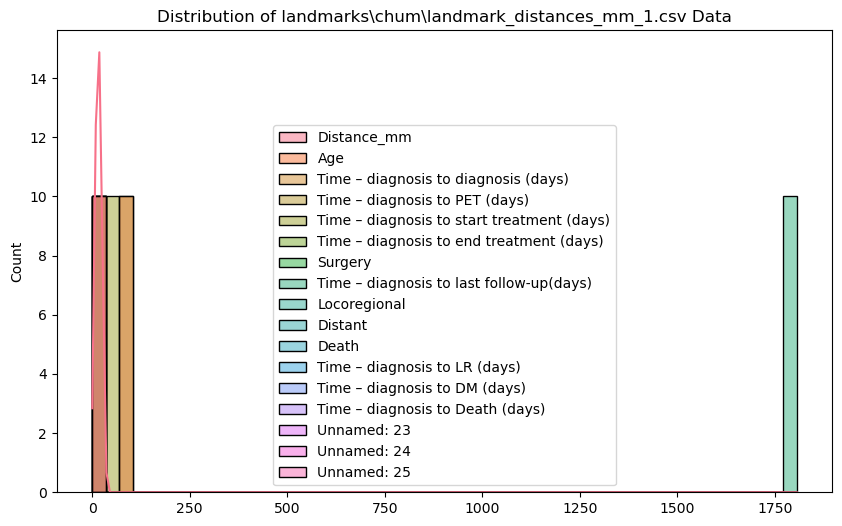

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


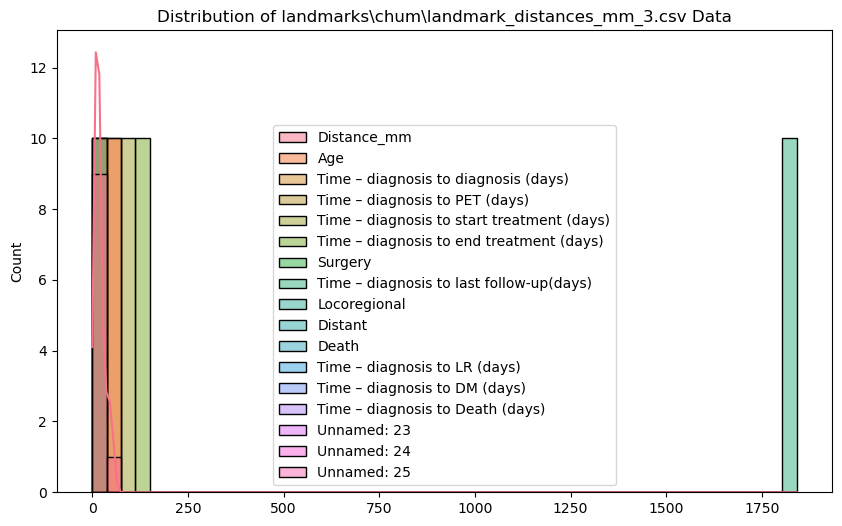

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


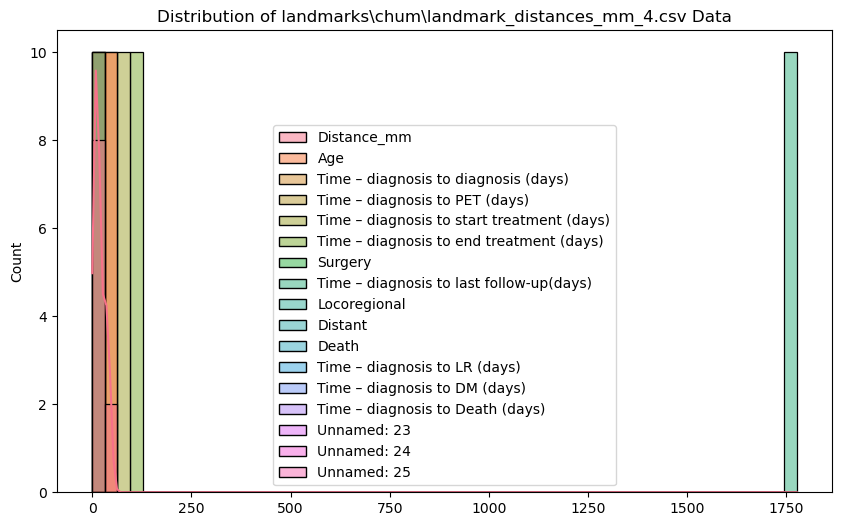

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


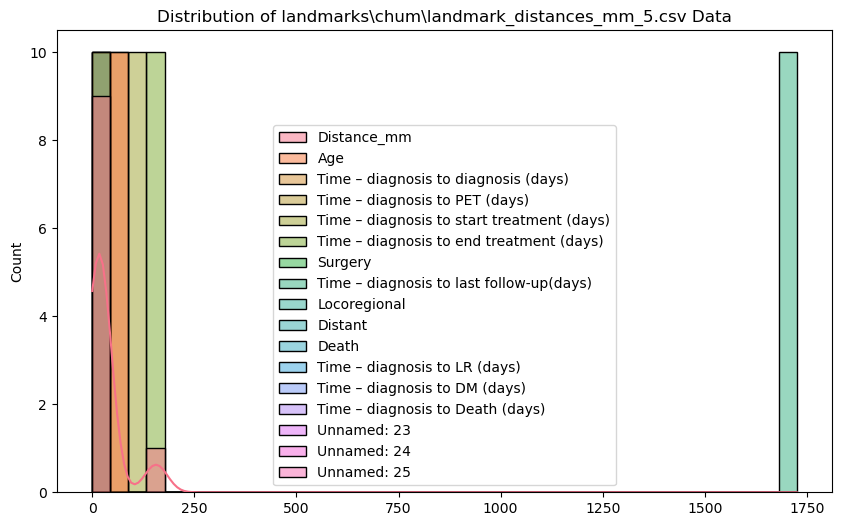

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


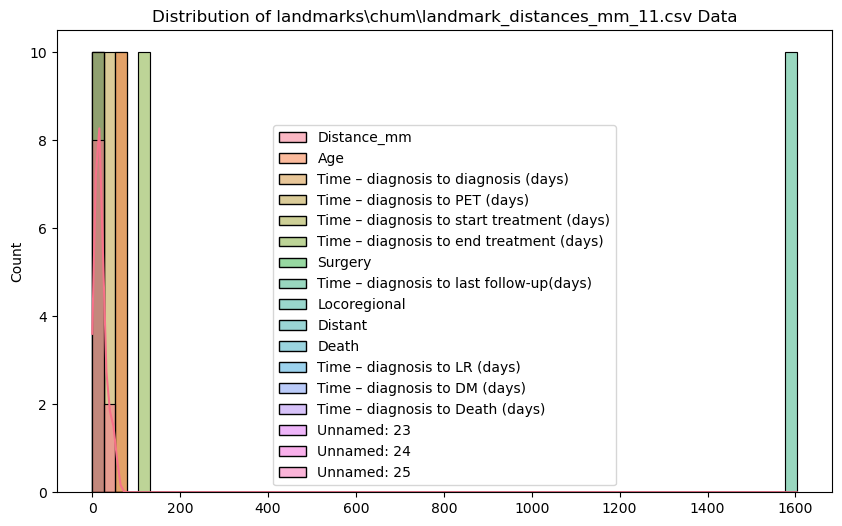

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


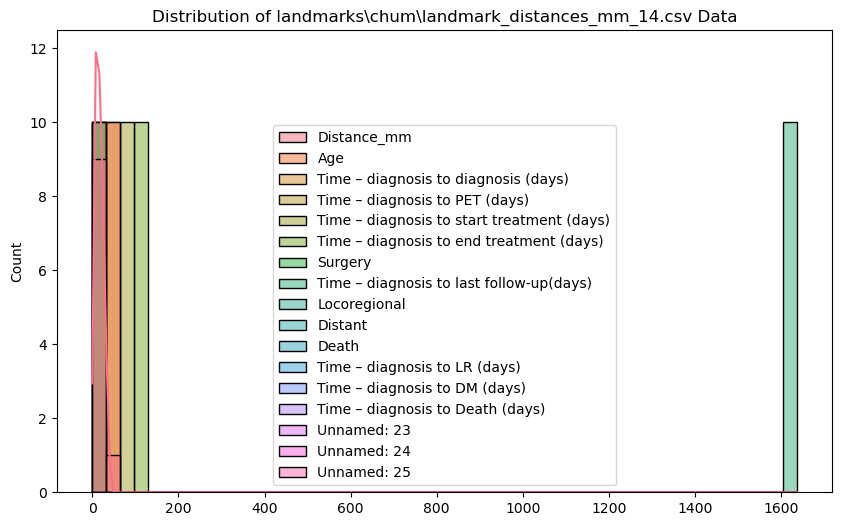

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


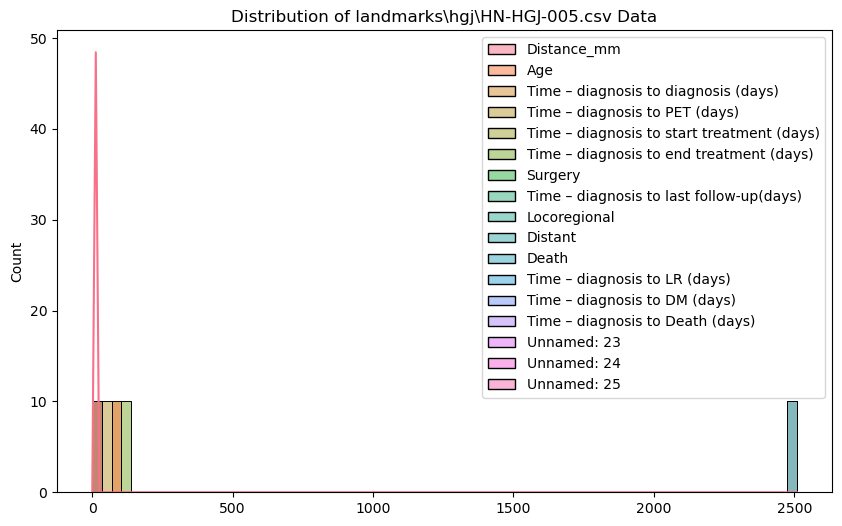

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


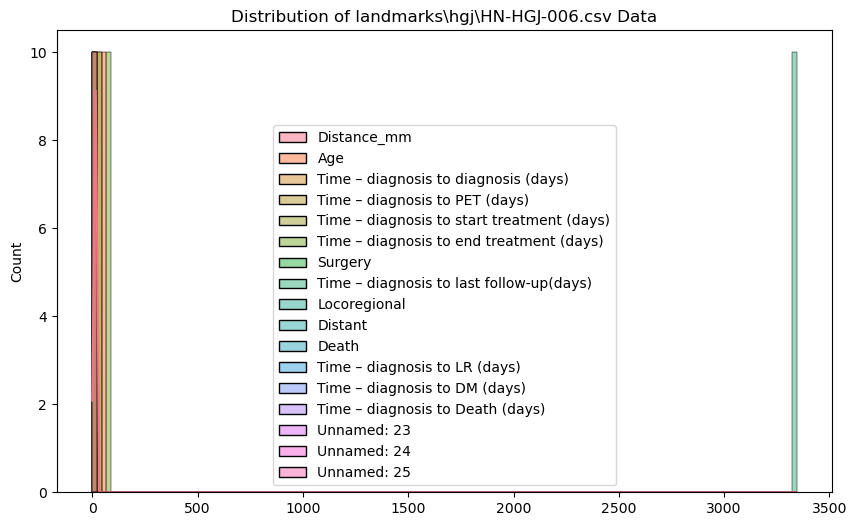

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


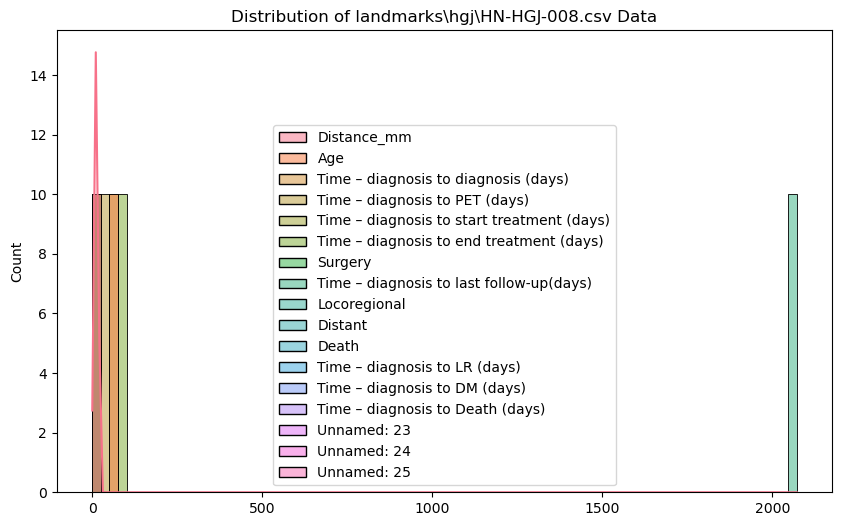

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


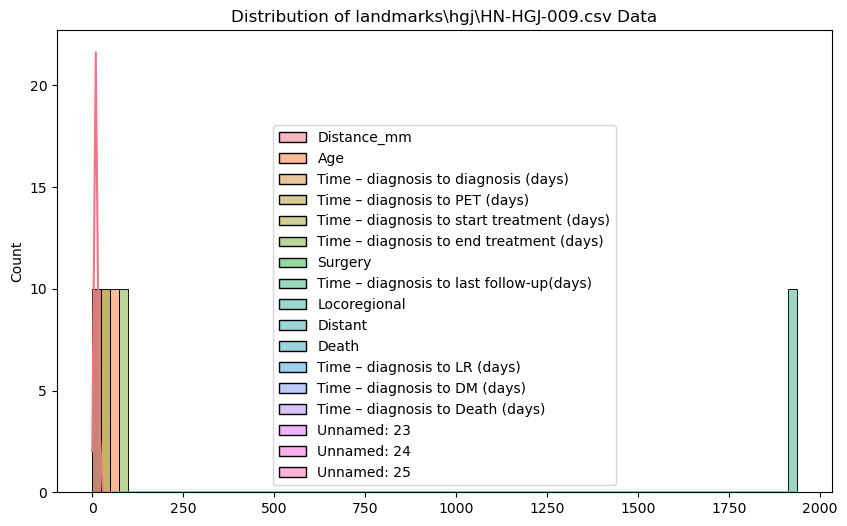

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


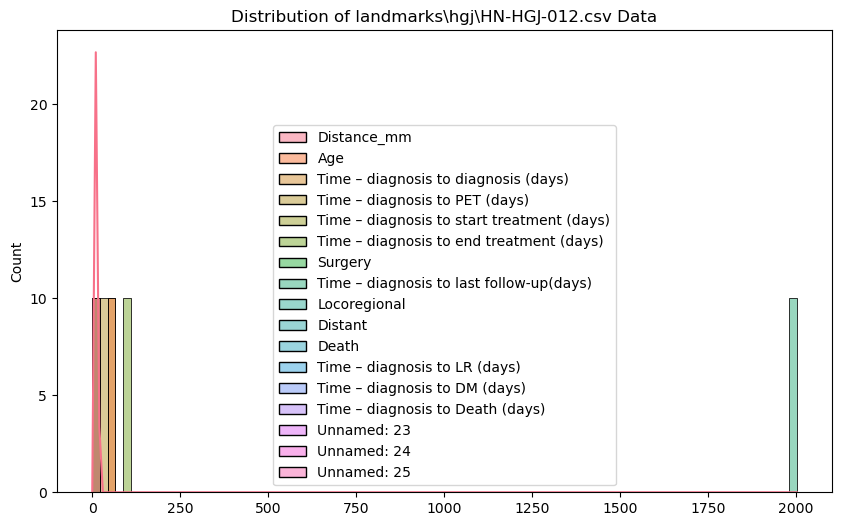

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


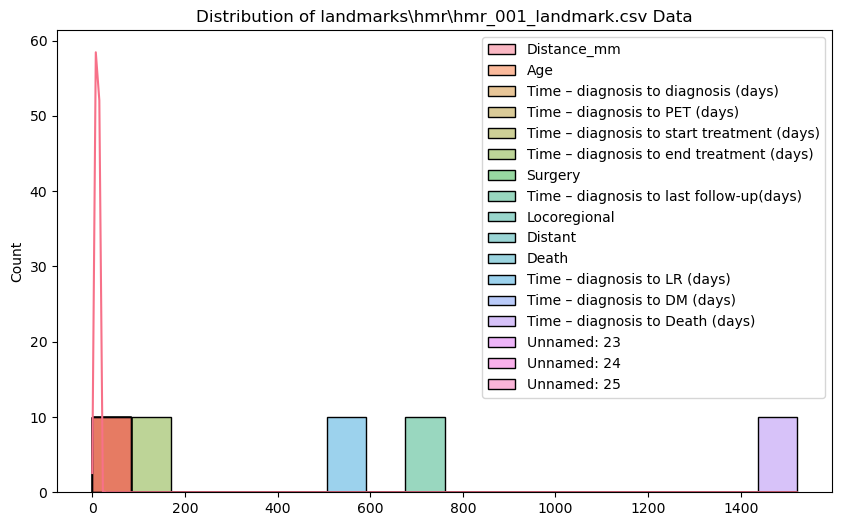

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


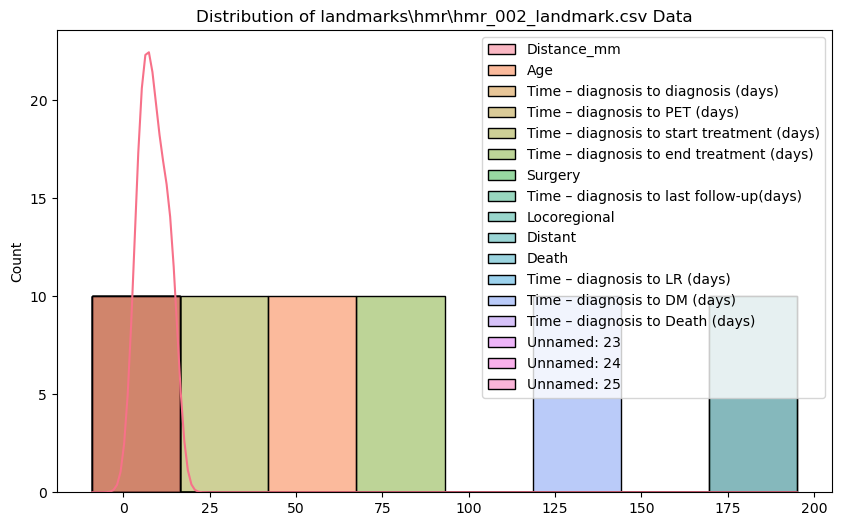

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


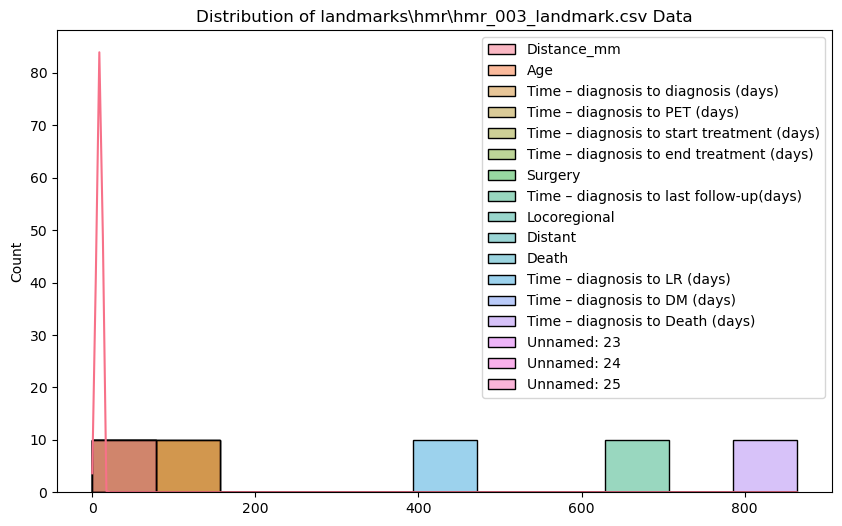

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


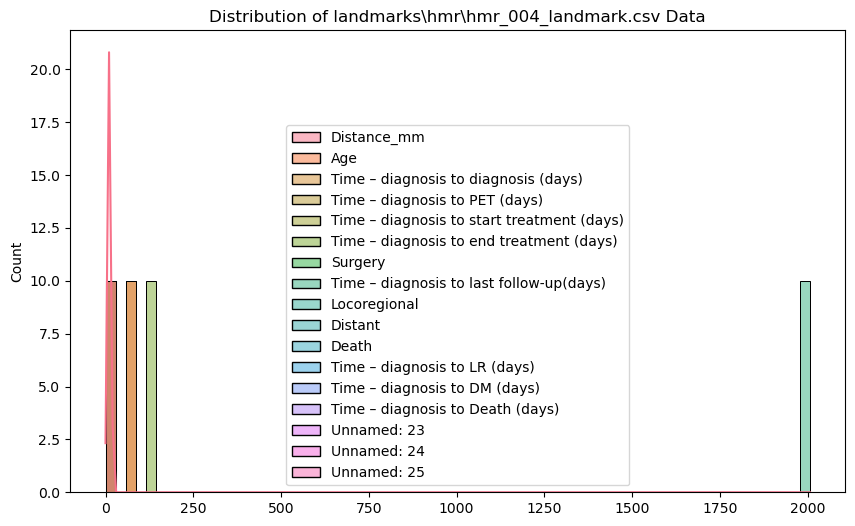

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


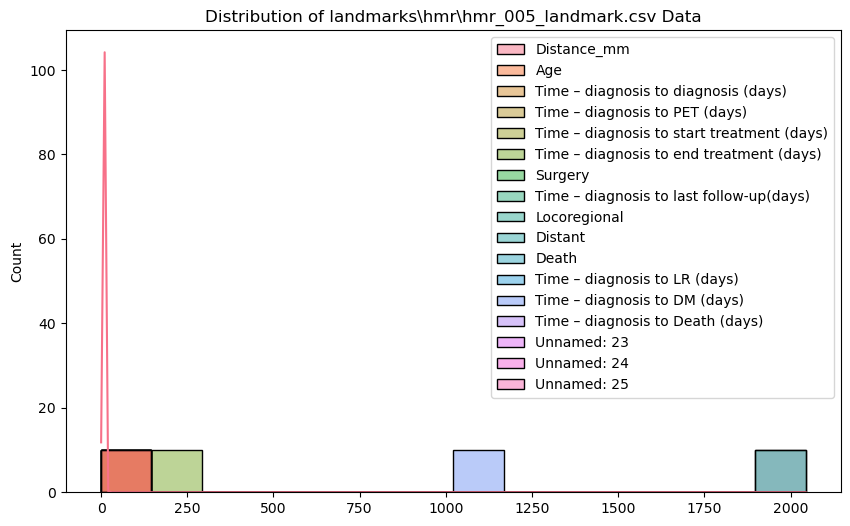

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


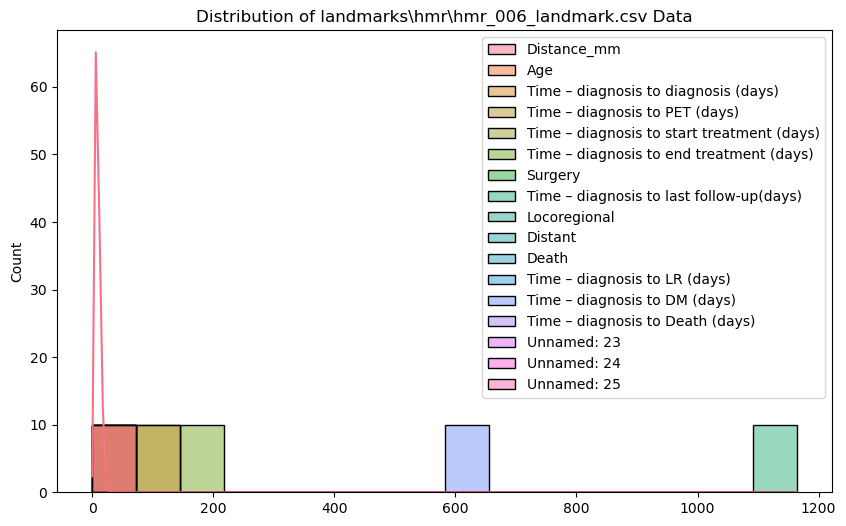

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


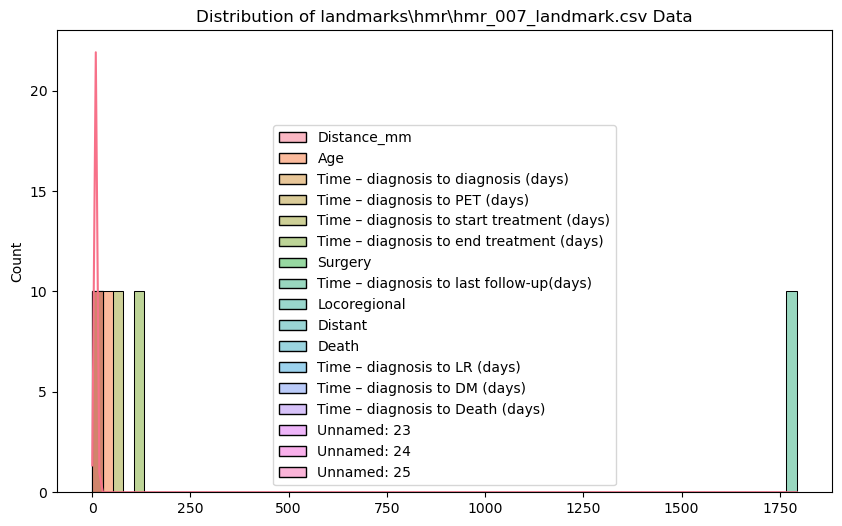

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


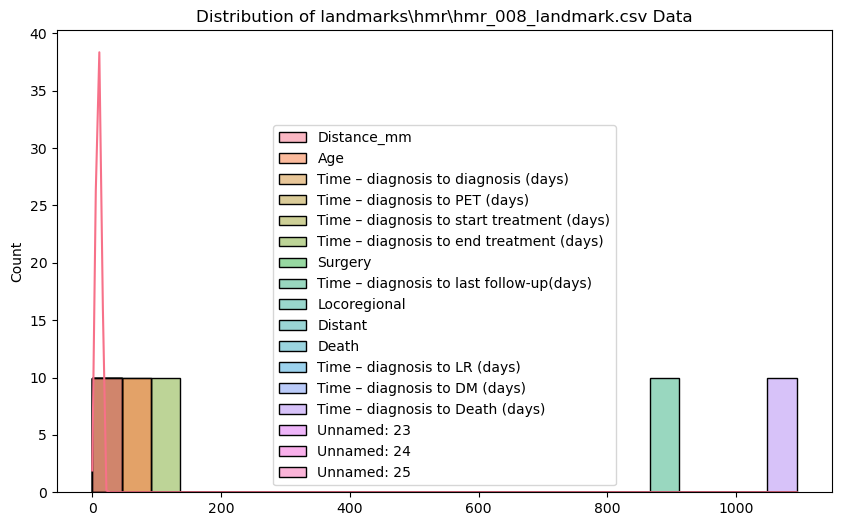

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


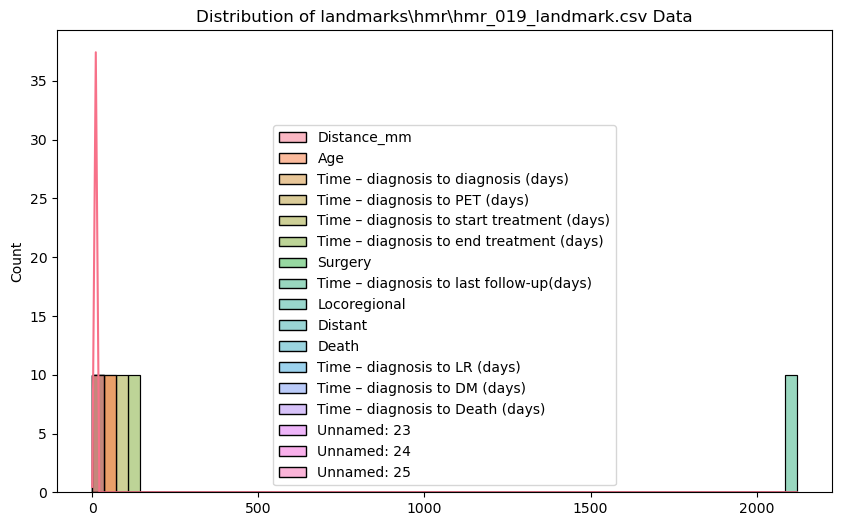

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


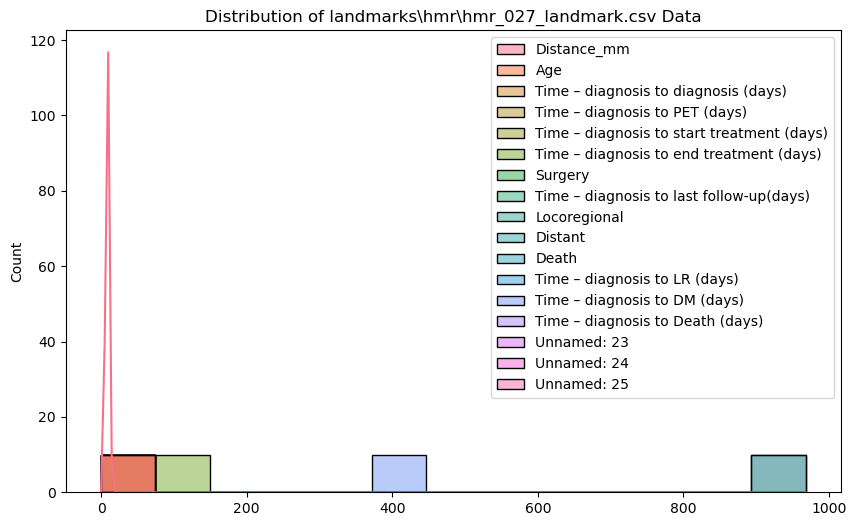

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


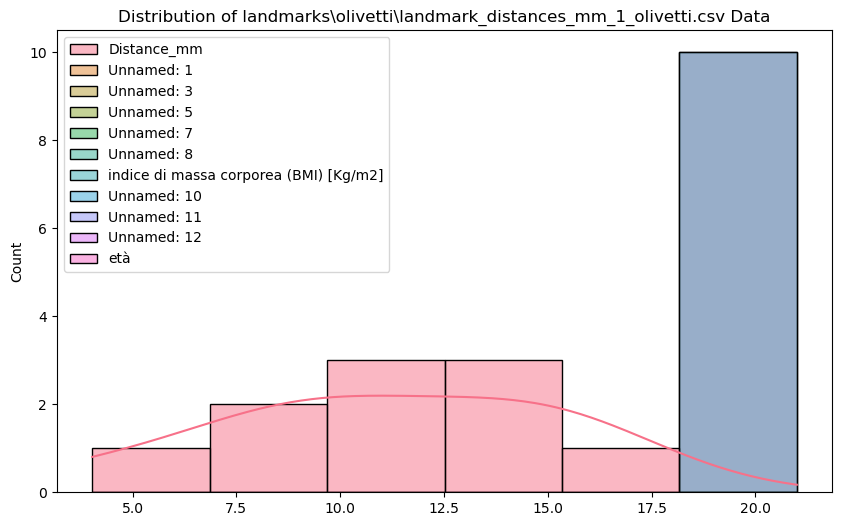

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


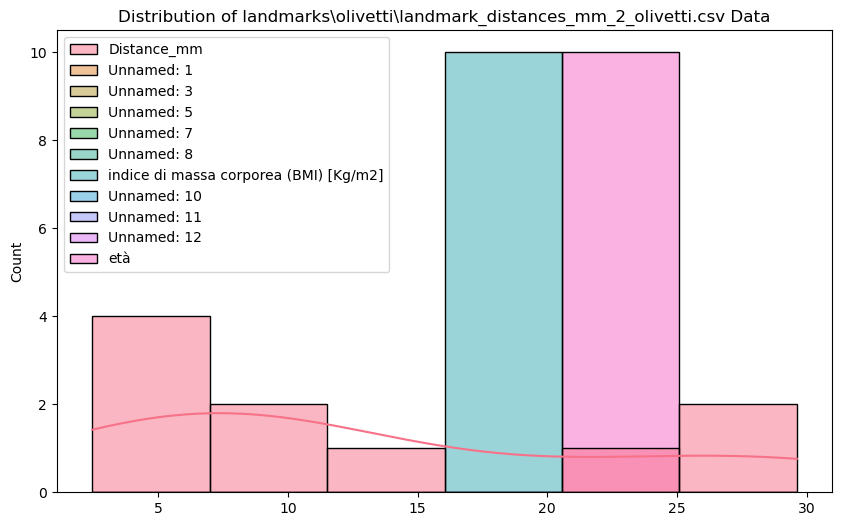

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


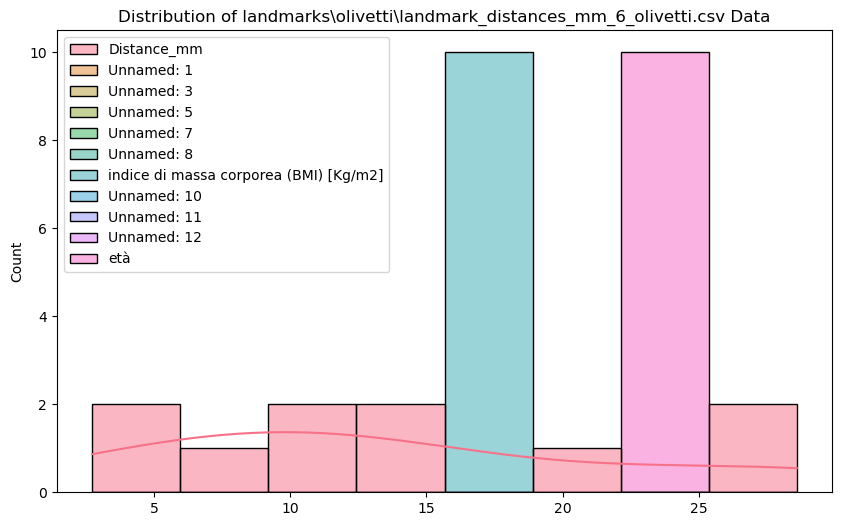

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


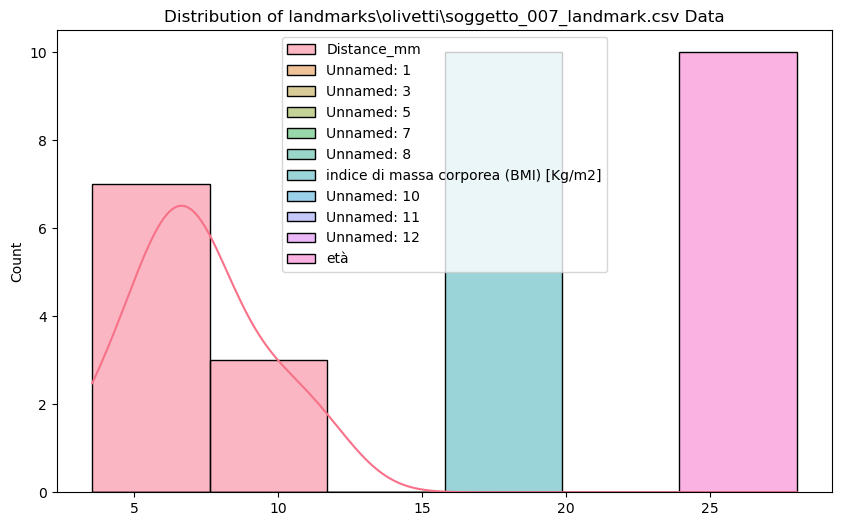

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


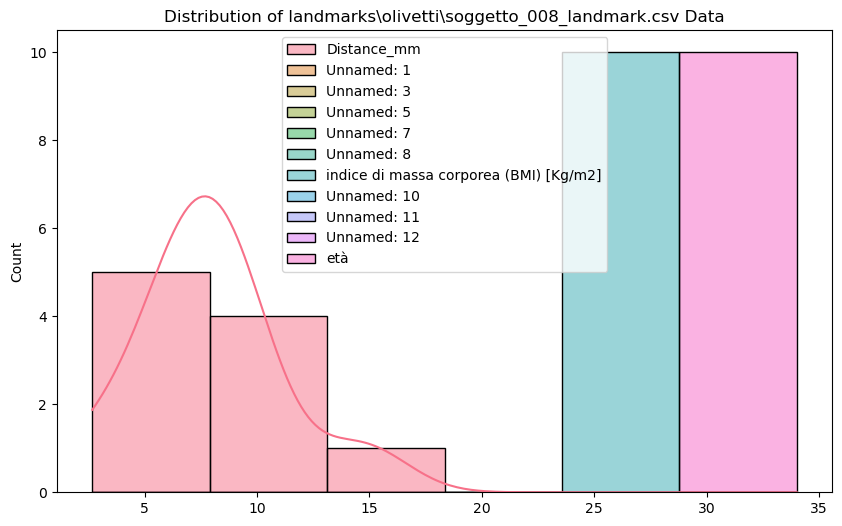

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


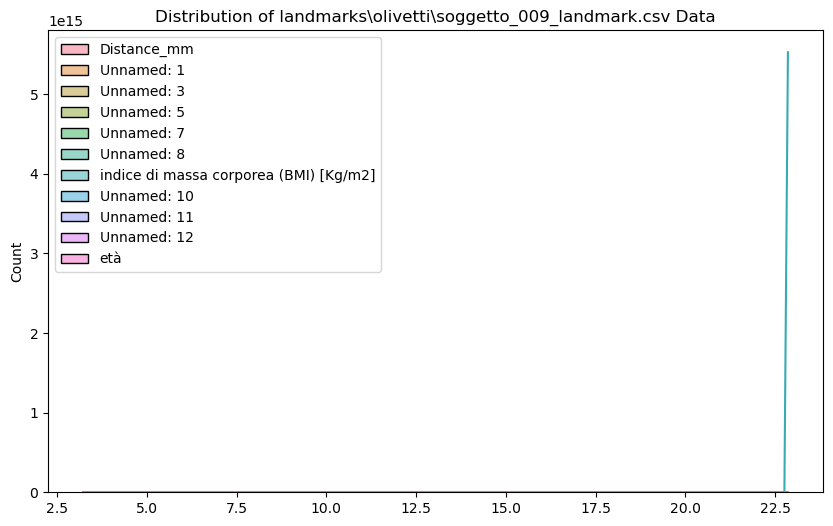

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


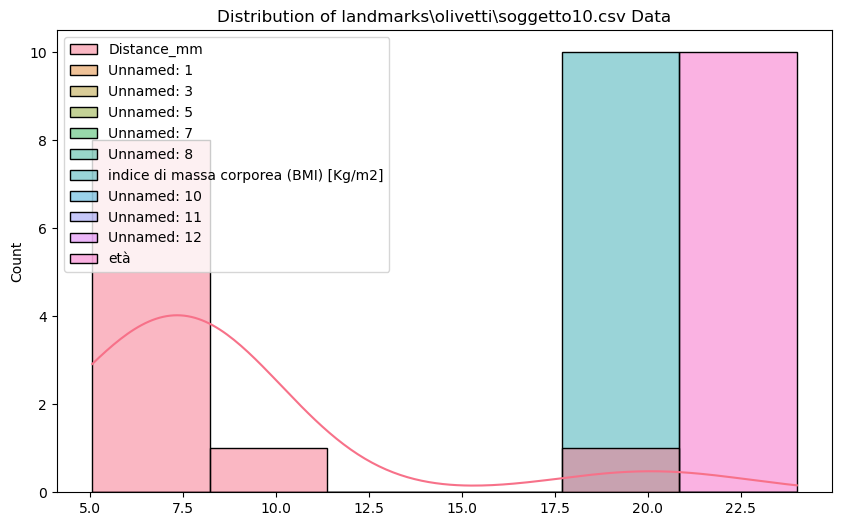

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


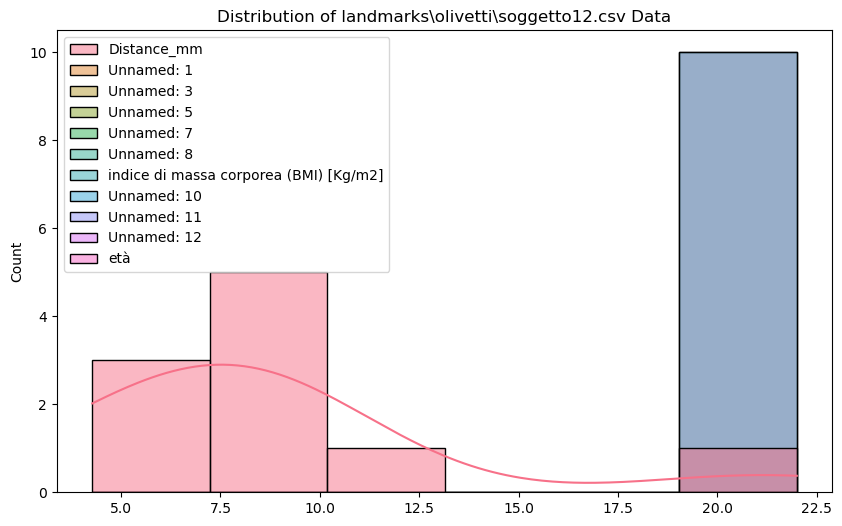

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


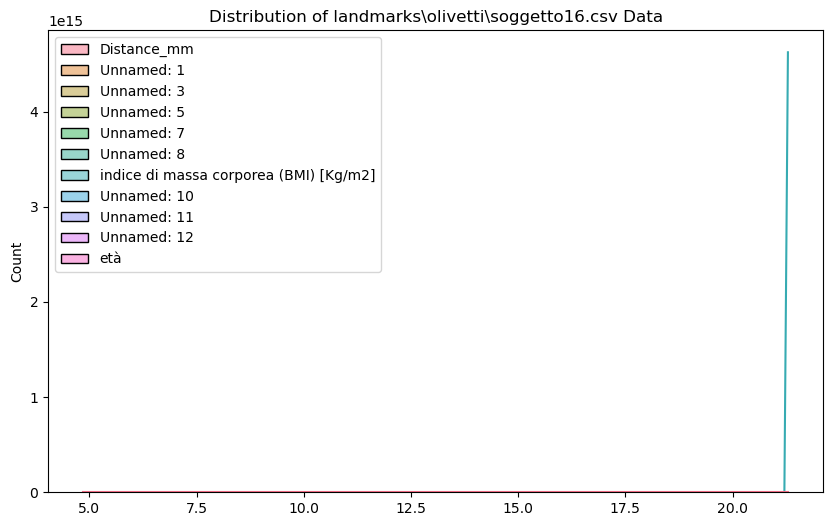

"\n# Plot correlation matrices\nfor name, df in chum_data.items():\n    numeric_df = df.select_dtypes(include='number')\n    correlation_matrix = numeric_df.corr()\n    plt.figure(figsize=(12, 8))\n    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')\n    plt.title(f'Correlation Matrix for {name}')\n    plt.show()\n\nfor name, df in olivetti_data.items():\n    numeric_df = df.select_dtypes(include='number')\n    correlation_matrix = numeric_df.corr()\n    plt.figure(figsize=(12, 8))\n    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')\n    plt.title(f'Correlation Matrix for {name}')\n    plt.show()\n"

In [6]:
# Plot distributions for CHUM datasets
for name, df in chum_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()

# Plot distributions for HGJ datasets
for name, df in hgj_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()

# Plot distributions for HMR datasets
for name, df in hmr_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()
    
# Plot distributions for Olivetti datasets
for name, df in olivetti_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()


"""
# Plot correlation matrices
for name, df in chum_data.items():
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()

for name, df in olivetti_data.items():
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()
"""


## Correlations

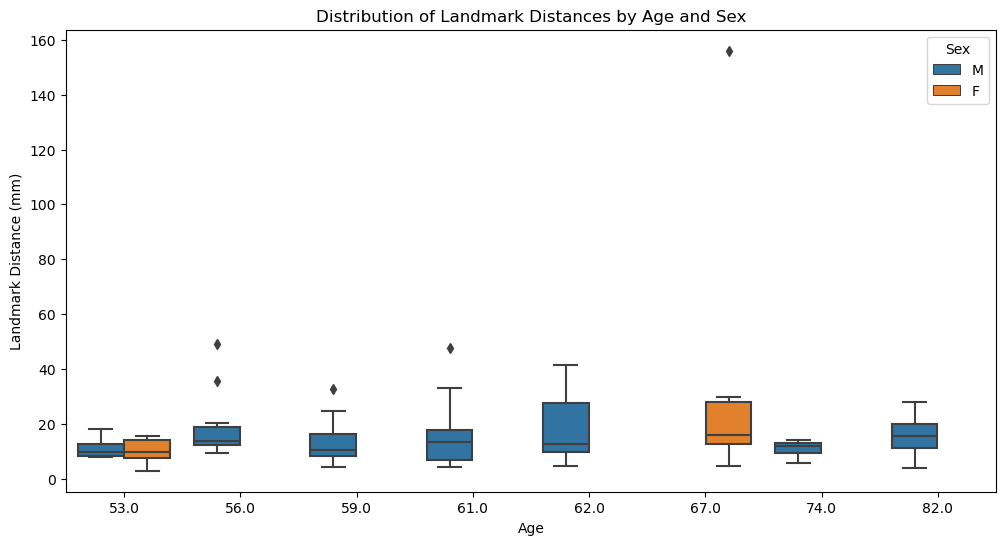

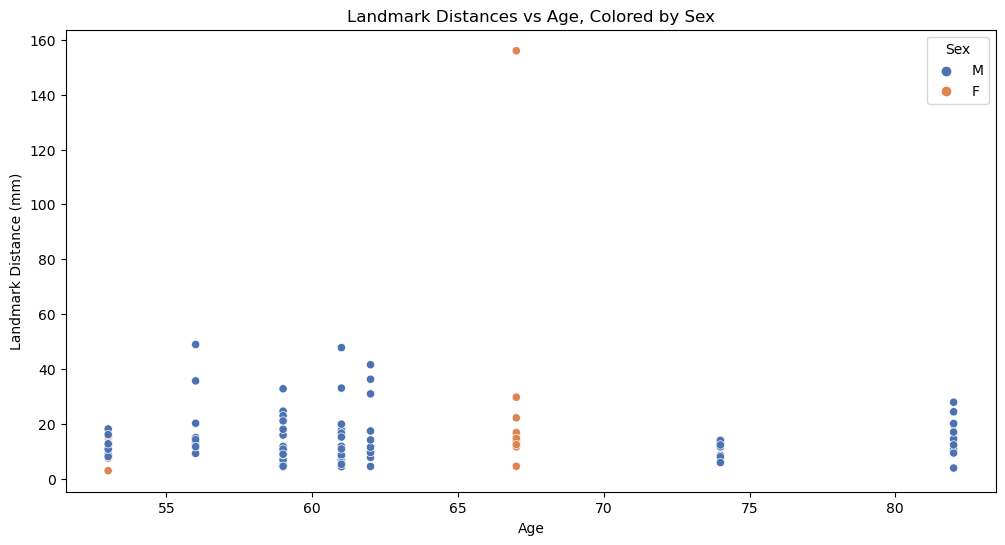

In [8]:
# Combine all CHUM dataframes
combined_chum_data = pd.concat(chum_data.values())

# Combine all HGJ dataframes
combined_hgj_data = pd.concat(hgj_data.values())

# Combine all Olivetti dataframes
combined_olivetti_data = pd.concat(olivetti_data.values())

# Combine CHUM, HGJ, and Olivetti dataframes into one
combined_data = pd.concat([combined_chum_data, combined_hgj_data, combined_olivetti_data], ignore_index=True)

# Group by age and sex and calculate summary statistics
grouped_stats = combined_data.groupby(['Age', 'Sex'])['Distance_mm'].describe()

# Box plot for distribution of distances by age and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Distance_mm', hue='Sex', data=combined_data)
plt.title('Distribution of Landmark Distances by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Landmark Distance (mm)')
plt.legend(title='Sex')
plt.show()

# Scatter plot for relationship between age and landmark distances
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Distance_mm', hue='Sex', data=combined_data, palette='deep')
plt.title('Landmark Distances vs Age, Colored by Sex')
plt.xlabel('Age')
plt.ylabel('Landmark Distance (mm)')
plt.legend(title='Sex')
plt.show()

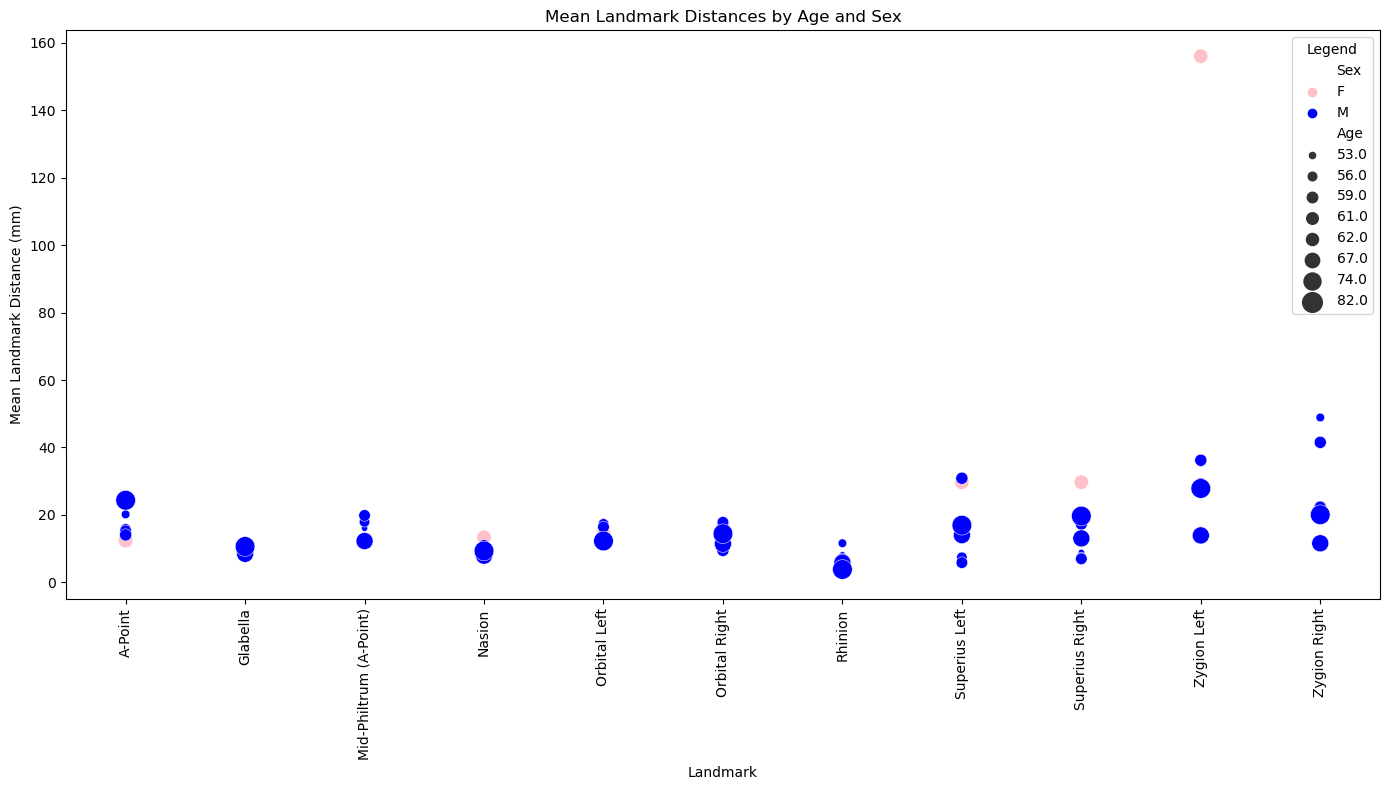

In [9]:
# Extract unique landmark points
landmarks = combined_data['Landmark'].unique()

# Calculate mean distances for each landmark
mean_distances = combined_data.groupby(['Landmark', 'Sex', 'Age']).agg({'Distance_mm': 'mean'}).reset_index()

# Create scatter plot with landmarks on the x-axis
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Landmark', y='Distance_mm', hue='Sex', size='Age', data=mean_distances, palette={'F': 'pink', 'M': 'blue'}, sizes=(20, 200), legend='full')
plt.title('Mean Landmark Distances by Age and Sex')
plt.xlabel('Landmark')
plt.ylabel('Mean Landmark Distance (mm)')
plt.legend(title='Legend')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Regression

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Combine all dataframes into one
combined_data = pd.concat([combined_chum_data, combined_hgj_data, combined_olivetti_data], ignore_index=True)

# Encode categorical variables
label_encoder = LabelEncoder()
combined_data['Sex'] = label_encoder.fit_transform(combined_data['Sex'])

# Select features and target variables
features = combined_data.drop(columns=['PatientID', 'Age', 'Sex'])
target_age = combined_data['Age']
target_sex = combined_data['Sex']

# Handle missing values in the target variables
target_age = target_age.fillna(target_age.mean())
target_sex = target_sex.fillna(target_sex.mode()[0])

# Separate numeric and non-numeric features
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
non_numeric_features = features.select_dtypes(exclude=['int64', 'float64']).columns

# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for non-numeric features
non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', non_numeric_transformer, non_numeric_features)])

# Split the data into training and test sets for age prediction
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(features, target_age, test_size=0.2, random_state=42)

# Split the data into training and test sets for sex prediction
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(features, target_sex, test_size=0.2, random_state=42)

# Age Prediction (Regression)
age_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

age_pipeline.fit(X_train_age, y_train_age)
y_pred_age = age_pipeline.predict(X_test_age)

mse = mean_squared_error(y_test_age, y_pred_age)
r2 = r2_score(y_test_age, y_pred_age)
print(f'Age Prediction - Mean Squared Error: {mse}')
print(f'Age Prediction - R-squared: {r2}')

# Sex Prediction (Classification)
sex_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

sex_pipeline.fit(X_train_sex, y_train_sex)
y_pred_sex = sex_pipeline.predict(X_test_sex)

accuracy = accuracy_score(y_test_sex, y_pred_sex)
classification_rep = classification_report(y_test_sex, y_pred_sex)
print(f'Sex Prediction - Accuracy: {accuracy}')
print('Sex Prediction - Classification Report:')
print(classification_rep)

Age Prediction - Mean Squared Error: 2.4991113477401655e-28
Age Prediction - R-squared: 1.0
Sex Prediction - Accuracy: 1.0
Sex Prediction - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

